<a href="https://colab.research.google.com/github/Fadelmuhammad013/Machine-learning/blob/main/04.%20Week%204/flu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, ConfusionMatrixDisplay
)

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))

Saving flu.csv to flu.csv


In [16]:

# Cek jumlah nilai unik di setiap kolom
print("Jumlah nilai unik setiap kolom:\n", df.nunique())

# Pilih kolom target yang mungkin (<= 10 nilai unik dan bukan kolom ID)
possible_targets = [col for col in df.columns if df[col].nunique() <= 10 and df[col].dtype in ['object', 'int64', 'bool']]
print("\nKolom kandidat target klasifikasi:", possible_targets)

Jumlah nilai unik setiap kolom:
 Diagnosis                        1
Age                            109
Sex                              2
serumLevelsOfWhiteBloodCell    127
lymphocytes                    117
CTscanResults                    2
RiskFactors                     63
Diarrhea                         2
Fever                            2
Coughing                         2
SoreThroat                       2
NauseaVomitting                  2
Temperature                    135
Fatigue                          2
dtype: int64

Kolom kandidat target klasifikasi: ['Diagnosis', 'Sex', 'CTscanResults', 'Diarrhea', 'Fever', 'Coughing', 'SoreThroat', 'NauseaVomitting', 'Fatigue']



===== Target saat ini: Diagnosis =====
Target bukan biner. Lewati evaluasi AUC/ROC.

===== Target saat ini: Sex =====
Akurasi : 0.5084175084175084
Presisi : 0.5228426395939086
Recall  : 0.6645161290322581
F1 Score: 0.5852272727272727
AUC     : 0.5094502498864152


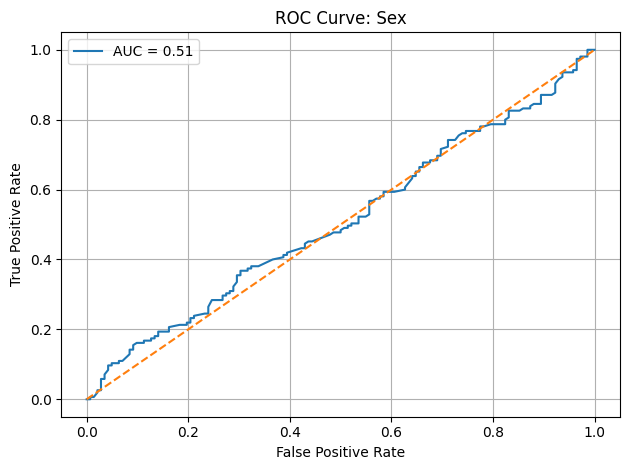


===== Target saat ini: CTscanResults =====
Akurasi : 0.98989898989899
Presisi : 0.98989898989899
Recall  : 1.0
F1 Score: 0.9949238578680203
AUC     : 0.4064625850340136


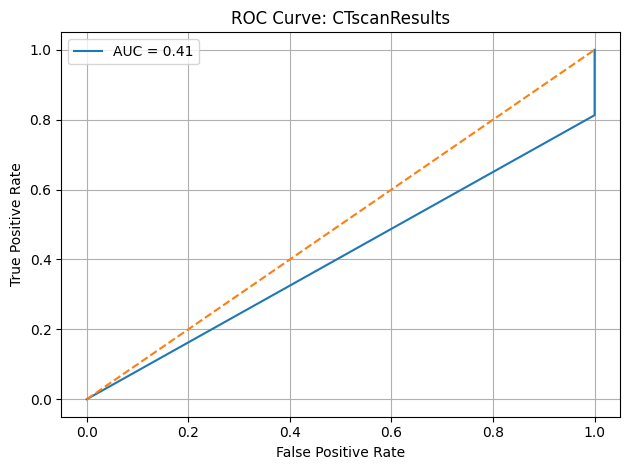


===== Target saat ini: Diarrhea =====
Akurasi : 0.898989898989899
Presisi : 0.25
Recall  : 0.03571428571428571
F1 Score: 0.0625
AUC     : 0.8081518852894318


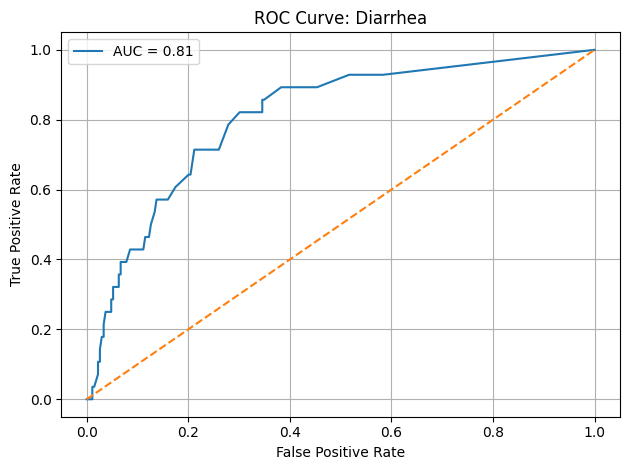


===== Target saat ini: Fever =====
Akurasi : 0.898989898989899
Presisi : 0.9178571428571428
Recall  : 0.9734848484848485
F1 Score: 0.9448529411764706
AUC     : 0.7662419651056015


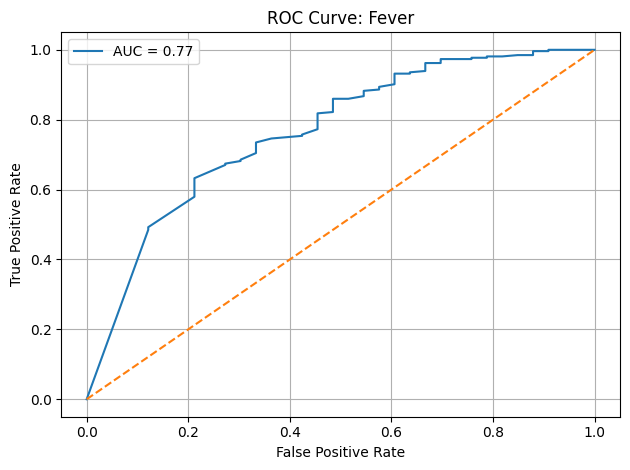


===== Target saat ini: Coughing =====
Akurasi : 0.9461279461279462
Presisi : 0.9608540925266904
Recall  : 0.9818181818181818
F1 Score: 0.9712230215827338
AUC     : 0.9076033057851239


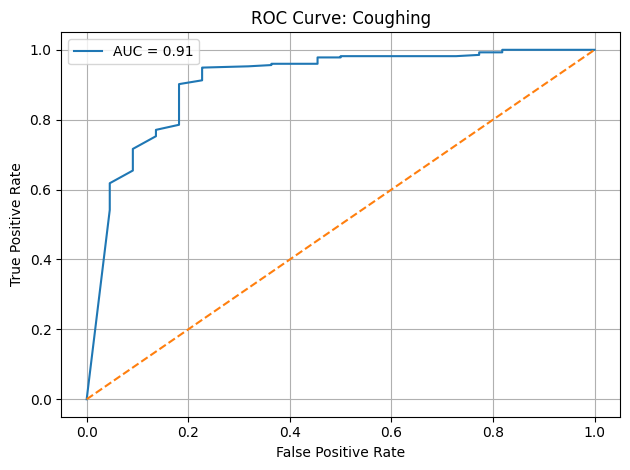


===== Target saat ini: SoreThroat =====
Akurasi : 0.8249158249158249
Presisi : 0.8774703557312253
Recall  : 0.9135802469135802
F1 Score: 0.8951612903225806
AUC     : 0.7619265355890871


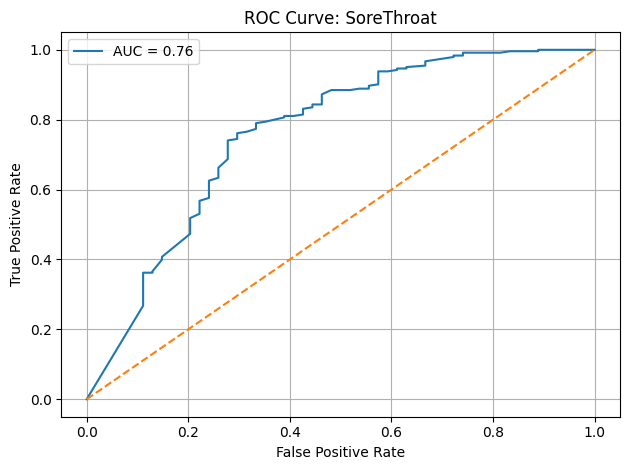


===== Target saat ini: NauseaVomitting =====
Akurasi : 0.9191919191919192
Presisi : 0.2857142857142857
Recall  : 0.09523809523809523
F1 Score: 0.14285714285714285
AUC     : 0.7931331953071082


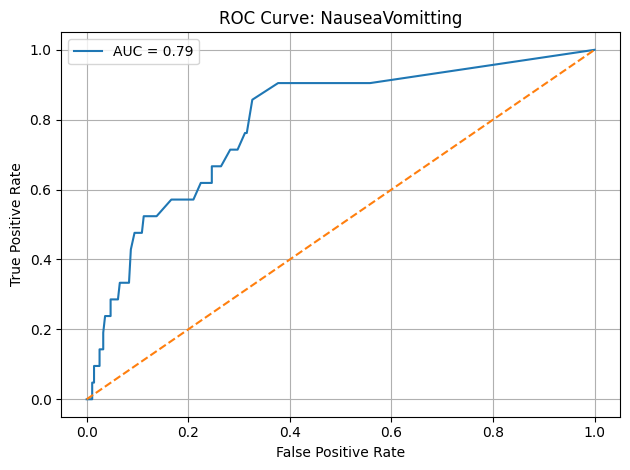


===== Target saat ini: Fatigue =====
Akurasi : 0.898989898989899
Presisi : 0.9328358208955224
Recall  : 0.9541984732824428
F1 Score: 0.9433962264150944
AUC     : 0.7844056706652125


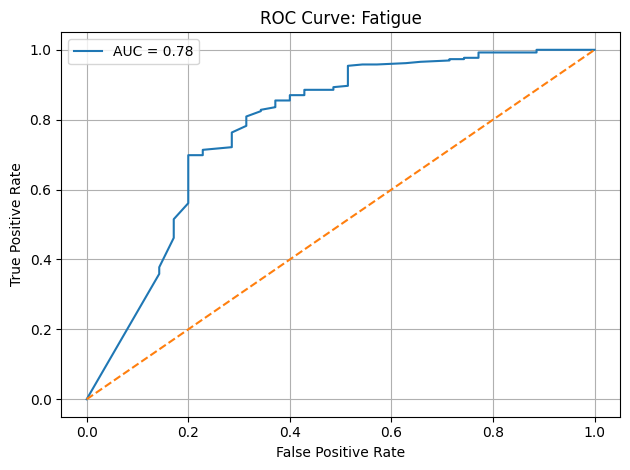

In [18]:
for target_col in possible_targets:
    print(f"\n===== Target saat ini: {target_col} =====")

    # Drop baris NaN di target
    df_target = df.dropna(subset=[target_col])

    # Pisahkan fitur dan target
    X = df_target.drop(columns=[target_col])
    y = df_target[target_col]

    # One-hot encoding fitur kategorikal
    X = pd.get_dummies(X)

    # Encode target jika perlu
    if y.dtype == 'object':
        y = LabelEncoder().fit_transform(y)

    # Skip kalau target bukan biner (untuk AUC/ROC)
    if len(np.unique(y)) != 2:
        print("Target bukan biner. Lewati evaluasi AUC/ROC.")
        continue

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Evaluasi
    print("Akurasi :", accuracy_score(y_test, y_pred))
    print("Presisi :", precision_score(y_test, y_pred))
    print("Recall  :", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("AUC     :", roc_auc_score(y_test, y_prob))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {target_col}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Penjelasan Metrik Evaluasi**

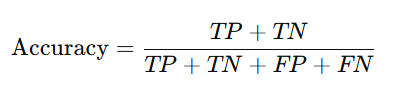


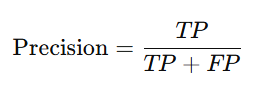

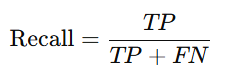

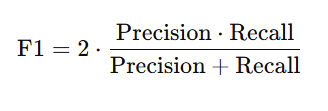

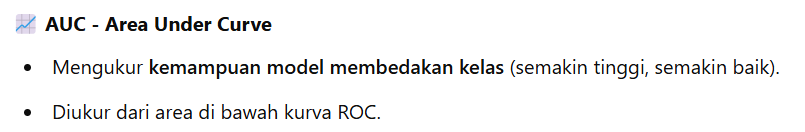

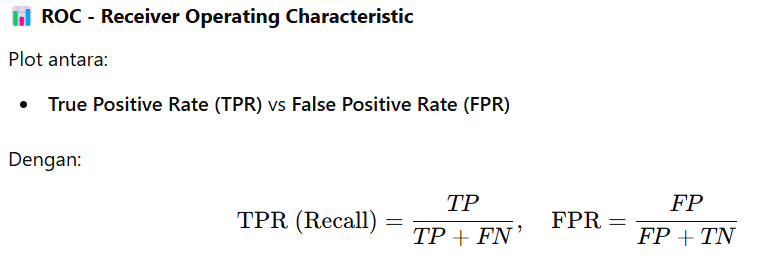